# Importing libraries

In [1]:
# importing pandas and seaborn libraries as pd and sns
import pandas as pd
import seaborn as sns
import regex as re
import nltk

# Opens the CSV file

In [2]:
#creating a dataframe
file="C:\\Users\\Ramachandraiah\\Downloads\\un-general-debates-blueprint.csv"
df = pd.read_csv(file)
df

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...


In [3]:
#displaying first 20 of a dataframe
df.head(20)

,session,year,country,country_name,speaker,position,text
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ..."
5,25,1970,BLR,Belarus,Mr. GURINOVICH,NaN,\n71.\t. We are today mourning the untimely de...
6,25,1970,BOL,"Bolivia, Plurinational State of",Mr. CAMACHO OMISTE,NaN,135.\t I wish to congratulate the President o...
7,25,1970,BRA,Brazil,Mr. GIBSON BARBOZA,NaN,"1.\tMr. President, I should like, first of all..."
8,25,1970,CAN,Canada,Mr. SHARP,NaN,\nThe General Assembly is fortunate indeed to ...
9,25,1970,CMR,Cameroon,Mr. AHIDJO,President,: A year ago I came here as the Acting Preside...


# Sample fraction

In [4]:
#displaying the dimensions of dataframe
#df=df.sample(frac=0.2)
df.shape

(7507, 7)

# Overview of a dataframe

In [5]:
df.columns #displaying column names
df.dtypes #displaying datatype of each column
df.info() #creating the dataframe info
df.describe() #displaying the description of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 410.7+ KB


,session,year
count,7507.000000,7507.000000
mean,49.610763,1994.610763
std,12.892155,12.892155
min,25.000000,1970.000000
25%,39.000000,1984.000000
50%,51.000000,1996.000000
75%,61.000000,2006.000000
max,70.000000,2015.000000


# Length of speeches

In [6]:
df['length'] = df['text'].str.len() #displaying a new column  as length
df.describe()# displayig describe of dataframe

,session,year,length
count,7507.000000,7507.000000,7507.000000
mean,49.610763,1994.610763,17967.281604
std,12.892155,12.892155,7860.038463
min,25.000000,1970.000000,2362.000000
25%,39.000000,1984.000000,12077.000000
50%,51.000000,1996.000000,16424.000000
75%,61.000000,2006.000000,22479.500000
max,70.000000,2015.000000,72041.000000


# Stats about text fields

In [7]:
df.describe(include='O') #desplaying categorical columns in a dataframe

,country,country_name,speaker,position,text
count,7507,7507,7480,4502,7507
unique,199,199,5428,113,7507
top,ALB,Albania,Seyoum Mesfin,Minister for Foreign Affairs,33: May I first convey to our President the co...
freq,46,46,12,1813,1


# Check for missing data

In [8]:
df.isna().sum()#finding missing values of each column of dataframe

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

# fill the missing data

In [9]:
df['speaker'].fillna('unknown', inplace=True) #filling missing values of a speaker as unknown
df['position'].fillna('unknown', inplace=True)#filling missing values of a position as unknown
df.isna().sum()#finding missing values of each column of dataframe

session         0
year            0
country         0
country_name    0
speaker         0
position        0
text            0
length          0
dtype: int64

# Uppercase

In [10]:
#converting values of speaker, position and text into uppercase
df['speaker']= df['speaker'].str.upper()
df['position']=df['position'].str.upper()
df['text']=df['text'].str.upper()

# Problem with text

In [11]:
df[df['speaker'].str.contains('BUSH')]

,session,year,country,country_name,speaker,position,text,length
2720,44,1989,USA,United States,BUSH,PRESIDENT,﻿I AM HONOURED TO ADDRESS THE GENERAL ASSEMBLY...,19779
2876,45,1990,USA,United States,GEORGE BUSH,UNKNOWN,﻿\nIT IS REALLY A GREAT PRIVILEGE TO GREET YOU...,15843
3038,46,1991,USA,United States,GEORGE BUSH,PRESIDENT,﻿I AM HONOURED TO SPEAK WITH YOU AS YOU OPEN T...,15555
3207,47,1992,USA,United States,MR. GEORGE BUSH,PRESIDENT,"FORTY-SEVEN YEARS AGO I WAS A YOUNG MAN OF 21,...",21105
4814,56,2001,USA,United States,GEORGE W. BUSH,PRESIDENT,﻿WE MEET IN A HALL DEVOTED TO\nPEACE; IN A CIT...,14724
5002,57,2002,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,﻿WE MEET ONE YEAR AND ONE DAY\nAFTER A TERRORI...,16684
5191,58,2003,USA,United States,GEORGE W. BUSH,PRESIDENT,"﻿TWENTY-FOUR MONTHS AGO, AND\nYESTERDAY IN THE...",16962
5382,59,2004,USA,United States,MR. GEORGE W BUSH,PRESIDENT,THANK YOU FOR THE HONOUR OF\nADDRESSING THE GE...,18628
5760,61,2006,USA,United States,MR. GEORGE W. BUSH,PRESIDENT,I AM GRATEFUL FOR THE PRIVILEGE OF \nSPEAKING ...,16675
5951,62,2007,USA,United States,GEORGE W. BUSH,PRESIDENT,THANK YOU FOR THE OPPORTUNITY \nTO ADDRESS THE...,15483


# charts

<Axes: >

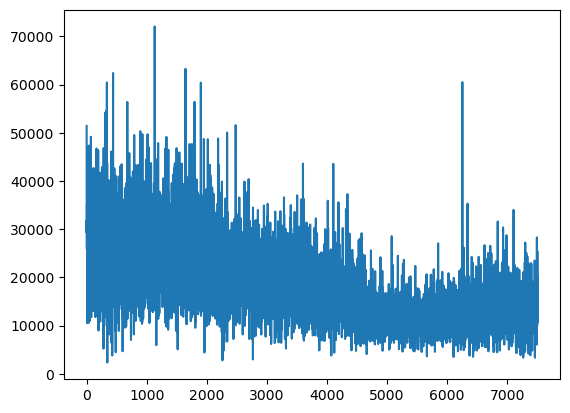

In [12]:
df['length'].plot() # plotting graph for length column


<Axes: >

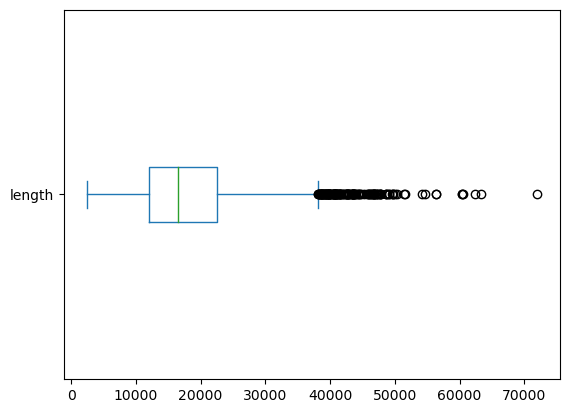

In [13]:
df['length'].plot(kind='box', vert=False) #creating a horizontal boxplot for length column 

# Histogram

<Axes: ylabel='Frequency'>

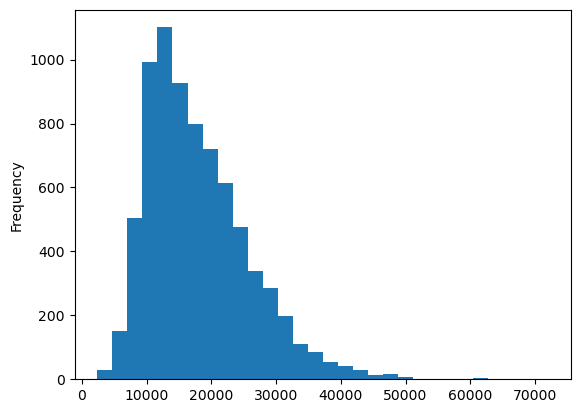

In [14]:
df['length'].plot(kind='hist', bins=30) #finding histogram for length column with 30 bins

# Function to tokenize

In [15]:
def tokenize(text):
    return re.findall(r'[\w-]*[a-z|A-Z][\w-]*', text)

In [16]:
testtext = "Let's defeat SARS-CoV-2 together in 2020! www.cdc.gov" #sample text
testtokens = tokenize(testtext) #by using tokenize function tokenize sample text
print(testtokens) #printing the list of testtokens

['Let', 's', 'defeat', 'SARS-CoV-2', 'together', 'in', 'www', 'cdc', 'gov']


In [17]:
nltk.download('stopwords') #downloading the stopwords from nltk
stopwords = set(nltk.corpus.stopwords.words('english')) # Get the list of English stopwords and arrange them in a list.
print(stopwords) #printing the output of stopwords

{'have', 'in', 'above', "mustn't", 'she', 'off', 'ourselves', 'wasn', 'had', 'or', 'not', 'you', 'all', 'its', "weren't", 'from', 'theirs', 'should', 'being', "shouldn't", 'when', 're', 'mightn', 'his', 'very', 'nor', 'her', 'm', 'they', 'between', 'there', 'below', 'both', 'ma', 'shouldn', 'be', 'until', "it's", 'himself', 'few', 'once', 'ours', 'into', 'with', 'each', "wasn't", "shan't", 'no', "you'd", 'he', 'am', 'did', 'down', 'again', 'here', "she's", 'your', 'most', 'ain', "aren't", 'won', 'through', 's', 'other', 'just', 'o', "wouldn't", 'whom', "doesn't", 'for', 'what', 'during', "don't", "isn't", 'him', 'me', 'my', 'i', 'before', 'of', "mightn't", 'them', 'has', 'under', 'then', 'wouldn', 'same', 'hadn', 'd', 'more', 'doesn', 'the', 'mustn', 'on', 'does', 'to', 'itself', "you'll", 'so', 'herself', 'it', 'their', 'because', 'than', 've', "didn't", "that'll", 'themselves', 'this', 'couldn', 'and', 'who', 'if', 'do', 'will', 'by', 'further', "hasn't", 'myself', 't', 'we', 'weren'

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ramachandraiah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Function to remove Stop words

In [18]:
def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in     # Removing stopwords from the list of tokens

            stopwords]
cleantokens= remove_stop(testtokens) # Testing the remove_stop function with testtokens
print(cleantokens)

['Let', 'defeat', 'SARS-CoV-2', 'together', 'www', 'cdc', 'gov']


# Make a pipeline

In [19]:
pipeline = [str.lower, tokenize, remove_stop]
def prepare(text, pipeline): #Set the input text as the token's initial value.
    tokens = text  # Apply each function in the pipeline to the tokens
    for fun in pipeline:
        tokens = fun(tokens)
    return tokens #returns the tokens

# Run the Pipeline

In [20]:
df['tokens'] = df['text'].apply(prepare, pipeline=pipeline)

# count the tokens

In [21]:
df['num_tokens'] = df['tokens'].map(len)


In [22]:
df.tail() #displays last five of a dataframe

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
7502,70,2015,YEM,Yemen,MR. ABDRABUH MANSOUR HADI MANSOUR,PRESIDENT,ON BEHALF OF THE PEOPLE AND THE GOVERNMENT OF ...,10568,"[behalf, people, government, yemen, would, lik...",894
7503,70,2015,YUG,Yugoslavia,MR. TOMISLAV NIKOLIĆ,PRESIDENT,\nSEVENTY YEARS HAVE PASSED SINCE THE ESTABLIS...,25430,"[seventy, years, passed, since, establishment,...",2118
7504,70,2015,ZAF,South Africa,JACOB ZUMA,PRESIDENT,I SHOULD LIKE TO CONGRATULATE THE PRESIDENT AN...,13662,"[like, congratulate, president, country, denma...",1160
7505,70,2015,ZMB,Zambia,MR. EDGAR CHAGWA LUNGU,PRESIDENT,I WOULD LIKE TO BEGIN BY THANKING THE SECRETAR...,14247,"[would, like, begin, thanking, secretary-gener...",1197
7506,70,2015,ZWE,Zimbabwe,ROBERT MUGABE,PRESIDENT,ALLOW ME AT THE OUTSET TO EXTEND TO MR. MOGENS...,11013,"[allow, outset, extend, mr, mogens, lykketoft,...",903


# Using the counter

In [23]:
from collections import Counter
tokens = tokenize("She likes my cats and my cats like my sofa.") #tokenize the input string 
testcount= Counter(tokens) #counting frequency of each token
print(testcount) #printing the token frequencies

Counter({'my': 3, 'cats': 2, 'She': 1, 'likes': 1, 'and': 1, 'like': 1, 'sofa': 1})


# Current count

In [24]:
more_tokens = tokenize("She likes dogs and cats.")
testcount.update(more_tokens) #updating token frequency with new tokens
print(testcount) #printing the updating token

Counter({'my': 3, 'cats': 3, 'She': 2, 'likes': 2, 'and': 2, 'like': 1, 'sofa': 1, 'dogs': 1})


In [25]:
counter = Counter() #intializing counter object
df['tokens'].map(counter.update) # Update the Counter with token frequencies column in the DataFrame
print(counter.most_common(5))#printing 5most common tokens

[('nations', 124508), ('united', 120763), ('international', 117223), ('world', 89421), ('countries', 85734)]


# Word frequency in its own dataframe

In [26]:
freq_df = pd.DataFrame.from_dict(counter,
orient='index', columns=['freq']) #converting counter object to dataframe
freq_df = freq_df.query('freq >= 1') #filtering tokens with frequency less than equal to 1
freq_df.index.name = 'token' #set index name dataframe to 'token'

# Sort and Display

In [27]:
freq_df = freq_df.sort_values('freq', ascending=False) #sort the dataframe to descending order
freq_df.head(10) #displaying top 10 frequencies

,freq
token,
nations,124508
united,120763
international,117223
world,89421
countries,85734
peace,72625
development,62632
states,59713
people,59338


# Stats

In [28]:
freq_df.describe() #creating frequency distribution's descriptive statistics.

,freq
count,68302.000000
mean,162.686276
std,1544.080072
min,1.000000
25%,1.000000
50%,2.000000
75%,15.000000
max,124508.000000


# Bar chart

[Text(0.5, 0, 'Frequency'), Text(0, 0.5, 'Token'), Text(0.5, 1.0, 'Top Words')]

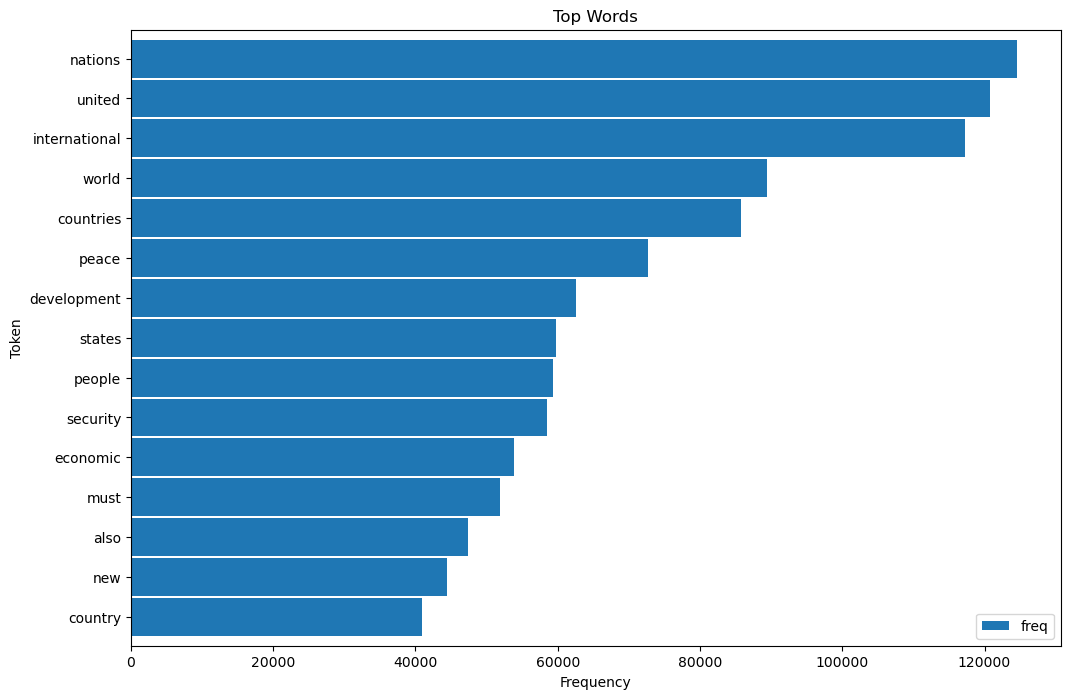

In [29]:
ax = freq_df.head(15).plot(kind='barh', width=0.95, figsize=(12,8)) #plot top 15 most frequency tokens
ax.invert_yaxis() # Invert the y-axis to display the most frequent tokens 
ax.set(xlabel='Frequency', ylabel='Token', title='Top Words')# Set the labels and title for the plot

# Installing wordcloud

In [31]:
!pip install wordcloud 

# Word cloud

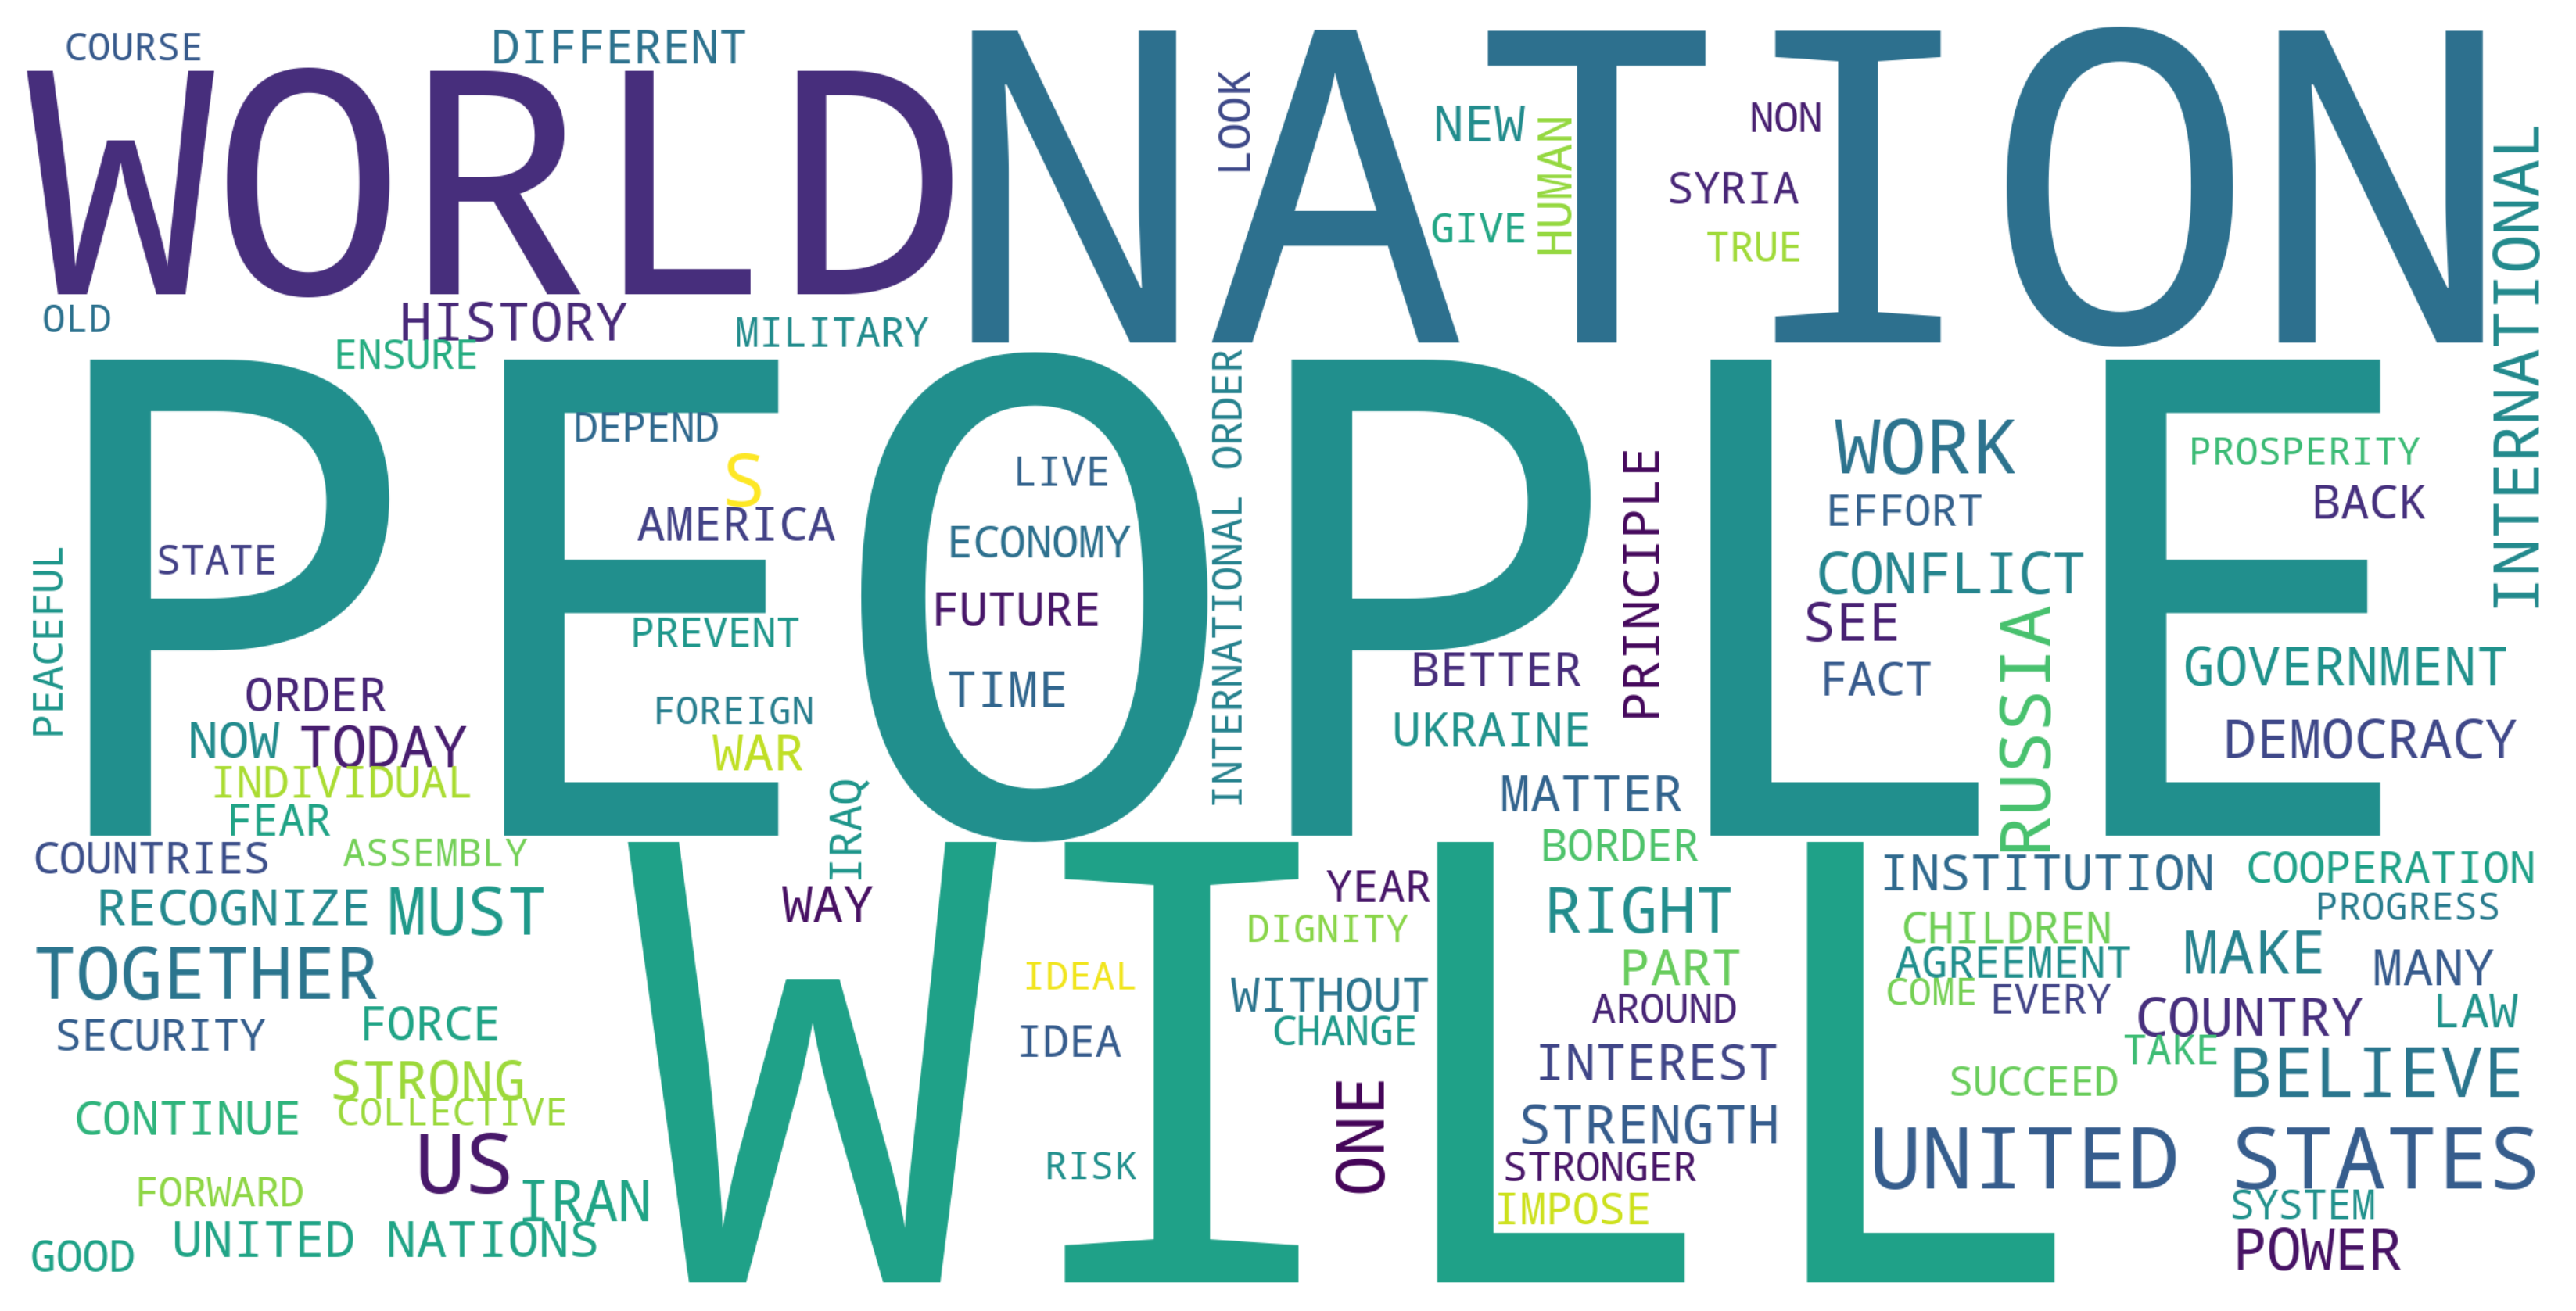

In [32]:
from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt

# Assuming df is your DataFrame and it contains a 'text' column
text = df.query("year==2015 and country=='USA'")['text'].values[0]

# Define stopwords if not already done
stopwords = set(STOPWORDS)

# Set the figure size and DPI for better resolution
plt.figure(figsize=(14, 7), dpi=300) 

# Create the WordCloud object with additional parameters for clarity
wc = WordCloud(max_words=100, stopwords=stopwords, width=800, height=400, scale=3, background_color='white')

# Generate the word cloud
wc.generate(text)

# Display the word cloud using matplotlib
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Turn off axis
plt.show()

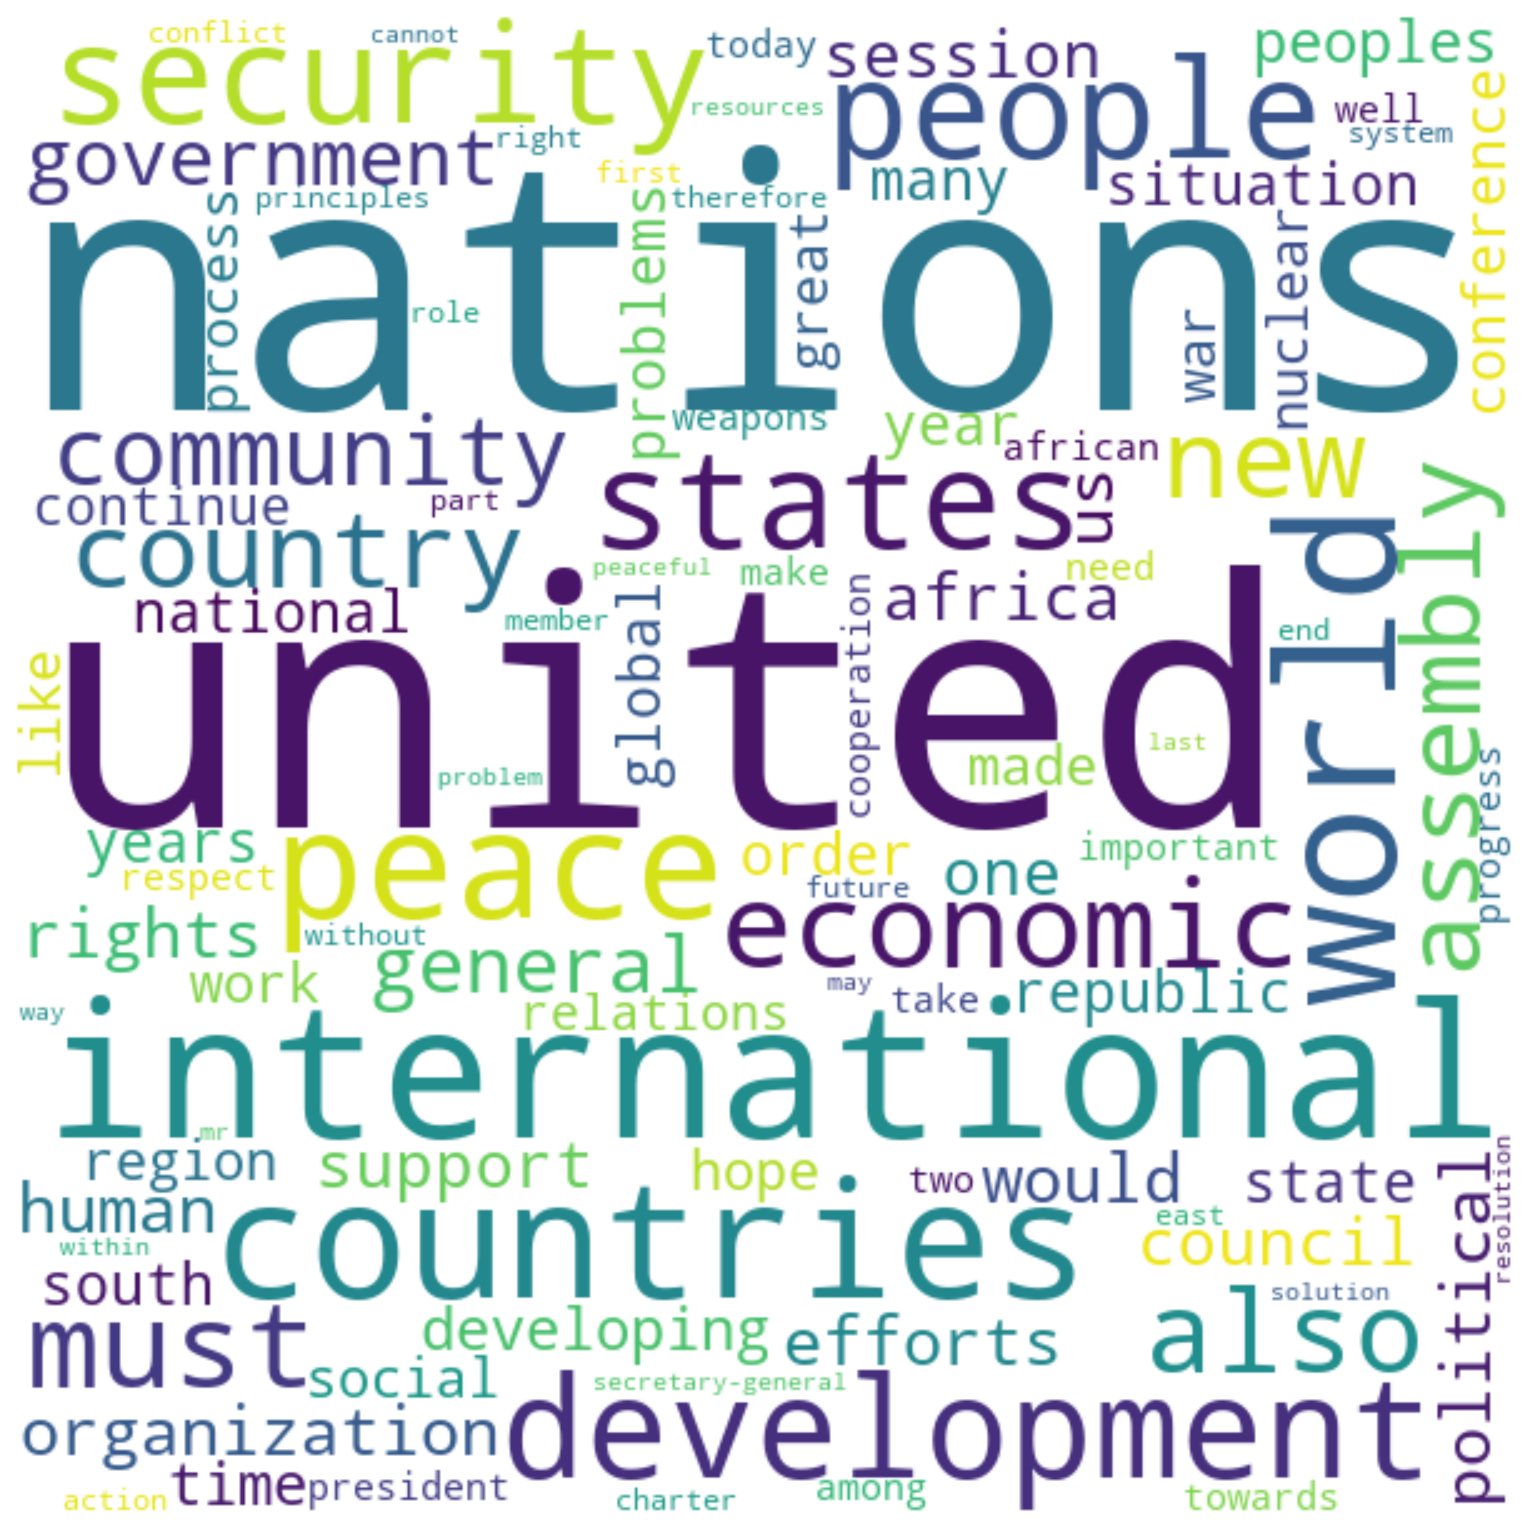

In [33]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

# Creating a WordCloud object with specific parameters
wc = WordCloud(background_color='white', width=600, height=600, max_words=100, margin=2)

# Fit the word frequencies to the WordCloud object
wc.fit_words(freq_df['freq'].to_dict())

# Setting the figure size and DPI for better resolution
plt.figure(figsize=(10, 10), dpi=150, facecolor=None)

# Display the word cloud using matplotlib
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")  # Turn off the axis
plt.tight_layout(pad=0)  # Adjust the layout
plt.show()  # Show the plot